# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** The smartcab does not move during the simulation of the default agent code.

The agent receives a positive reward when there is a red signal and when the agent does not have the right-of-way. This is because agent is not supposed to move during this time and that is exactly what it is doing. On the other hand, when there is a green signal and when the agent has the right-of-way, it receives a negative reward. This is because the agent is supposed to move during this time instead of idling, thereby receiving a negative reward for the incorrect decision of not moving.

When the light changes to 'green', higher positive rewards are given for moving in the correct direction and when one has the right-of-way. Negative rewards are given for moving in the incorrect direction when the light is green because the green light might not be for the direction where one wants to move. For example, if the light is green and the agent moves left when there is oncoming traffic moving forward, this can cause an accident and will get a high negative reward.

When the light changes to 'red', higher rewards are given for stopping (waiting) or for moving in the correct direction when one has the right-of-way. Negative rewards are given for moving in the incorrect direction at a red signal when one does not have the right-of-way.

More details about the right of way is available here: https://driversed.com/driving-information/signs-signals-and-markings/right-of-way-laws.aspx .

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** The three flags that can be set in agent.py are as follows:

* Learning: This is a boolean variable. If the value of this flag is set to true, then the smartcab will learn from each run of the simulator. It will learn to perform actions that give it a positive reward, like following signals and reaching the destination as quickly as possible. If the value of this flag is set to false, then the smartcab will not learn from its mistakes, thereby performing sub-optimally.
* Alpha (learning rate): It determines the extent to which new information is factored into the Q-Learning q-table. So, a very low alpha would make the agent ignore new information whereas a high value of alpha makes the agent give more weightage to recent information. In the case of the smartcab, the aim is to learn traffic rules. So, more weightage needs to be given to recent information (recent rules learned for obeying traffic rules perfectly or penalty for breaking the law). More information about the learning rate is available here: https://en.wikipedia.org/wiki/Q-learning#Learning_rate .
* Epsilon (exploration rate): When the smartcab learns from the rewards that it gets from its own actions, it will always choose the action that gives the best reward from its past experience, even if there is a better option available. To overcome this limitation, the exploration rate is introduced, which decideds whether a random action is chosen or the best action from past experience is chosen. A higher value of epsilon means that the smartcab will prefer to try out a new action rather than the best action from previous experience and visa versa. More information about the exploration rate is available here: https://studywolf.wordpress.com/2012/11/25/reinforcement-learning-q-learning-and-exploration/ .

In environment.py, the 'act' Environment class function is called when an smartcab performs an action and gets a reward.

In simulator.py, the 'render_text()' function renders the simulation of the environment in a non-graphical format, to the terminal or the the command prompt. So, only textual data is available via this function.

On the other hand, in simulator.py, the 'render()' function renders the simulation of the environment in a graphical format, with suplementary data being written to the terminal or the the command prompt via the 'render_text()' functions. So, visual data is available via this function, in addition to the textual data that is already available.

In planner.py, the East-West direction is considered before the North-South direction in the 'next_waypoint()' function.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


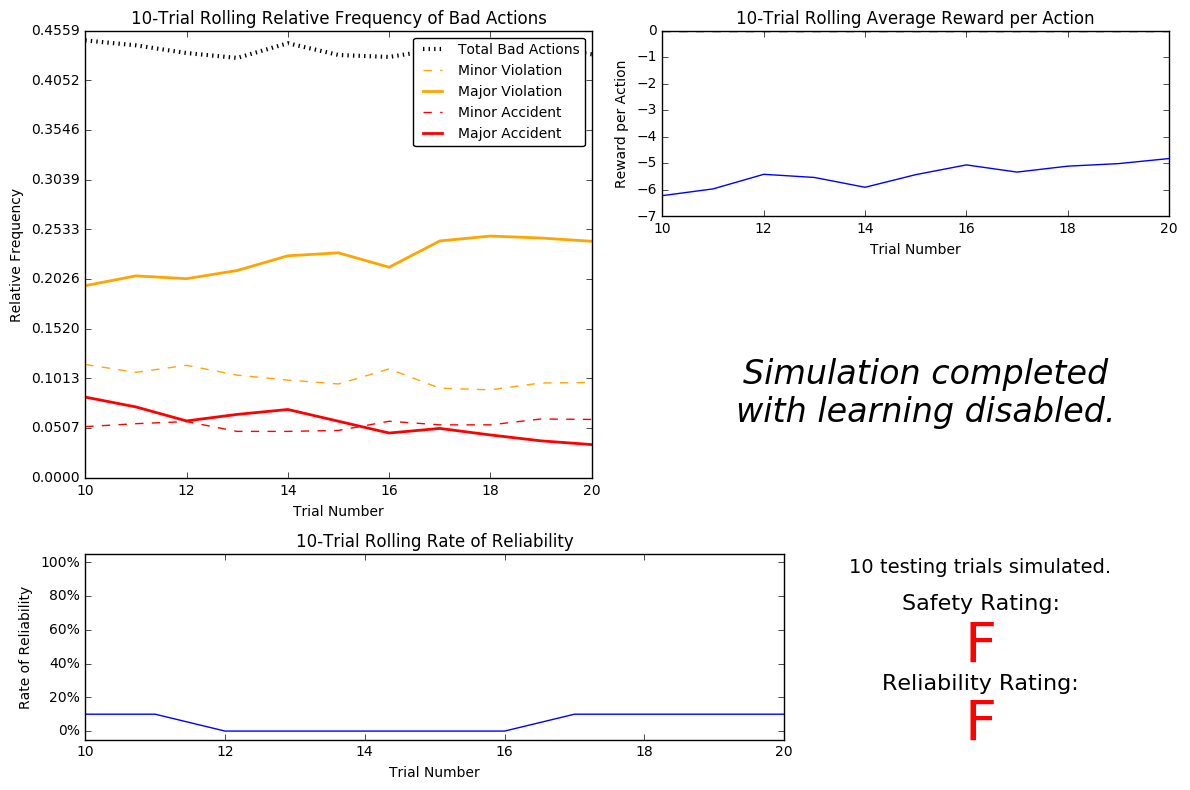

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** Analysis:

* The plot of relative frequency of bad actions gives information about how many bad actions were taken out of the total number of actions taken. On average, the driving agent is performing bad actions with a relative frequency between '0.42' and '0.45'. In total, with a relative frequency of between '0.04' and '0.08', the driving agent caused accidents (minor or major). More details about relative frequency are available here: https://www.mathsisfun.com/data/relative-frequency.html .
* The rate of reliability is the rate at which an engineered component fails. So, in this case, the graphs refers to the rate at which the smartcab fails to reach the destination. The rate of reliability is around 10% at the start of the training phase. It increases and decreseas as the number of trials increases. So, there is no clear 1:1 pattern observed here. This is to be expected because the agent is choosing random actions, so the rate of reliability will keep on fluctuating. More information about the rate of reliability is available here: https://en.wikipedia.org/wiki/Failure_rate .
* As per the graph on average rewards received per action, the agent is always receiving negative rewards. At the start of the training phase, the average rewards per action are very slightly more negative than in the later trials. As the trials proceed, the rewards start fluctuating between more negative and less negative. Overall, the average rewards per action at only slightly negative, reaching a maximum negative value of around '-6' and then decreasing to around '-5' in the last trial. So, these average rewards do not suggest that the agent has been penalized heavily, like when it causes a major accident. This could be because the agent might have taken many correct decisions and received positive rewards, which would cancel out most of the negative rewards received due to accidents.
* The outcome of the results does not change significantly as the number of trials increases. The rate of realibility is around '10%' in the first trial as well as in the last trial. Also, the relative frequency of major violations and major accidents changes only by around '0.05'.
* This smartcab would not be considered safe for it's passengers because it has caused many major accidents. Also, this smartcab is not reliable because it does not reach it's destination most of the times.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:** The following features and their possible values are appropriate for modeling the smartcab environment, so that the agent can learn about both safety and efficiency:
* Input Light
* Input Oncoming
* Input Left
* Next waypoint

These features are appropriate for this problem because of the following reasons:
* The signal light colour and the oncoming traffic direction together give information about whether it is safe to move left.
* The signal light colour and the left-hand side traffic's direction give information about whether it is safe to move forward or right.
* In order for the agent to get it's own bearings in the environment with respect to the goal state, the next waypoint is important and required. This is because the next waypoint allows the agent to find the "general" direction of the goal state (in a perpendicular grid environment) with respect to the agent's current state.

* The 'input right' input feature is not required for modeling the environment because it provides redundant information. This is because the agent does not need to yield to traffic on the right-hand side.
* The deadline input does not help in deciding which action to take at any given point of time. This is because the smartcab should be making different decisions based on the number of actions remaining till the deadline is reached. Otherwise, the smartcab might take rash actions like breaking the law and causing accidents, just to fulfill the deadline condition.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** There are 96 states that could be used to model the smartcab environment where each state is a combination of the following variables:

* Light: Red, Green
* Oncoming: None, Forward, Left, Right
* Left: None, Forward, Left, Right
* Next waypoint: Forward, Left, Right

The various possible combinations of these values gives “2 x 4 x 4 x 3 = 96 states”.

So, an example state would look like:

{'light': 'Green', 'oncoming': 'Forward', 'left': None, 'next_waypoint': 'Right'}

Optimizing the above in code, this state name could look like the following string:

('Green', 'Forward', 'None', 'Right')

which corresponds to ('light', 'oncoming', 'left', 'next-waypoint') and which is the same as the above mentioned example state.

Yes, the driving agent could learn a policy for each possible state within a reasonable number of training trials. Since the number of states is 96, at least 96 trials would be required to learn a policy for each possible state in an ideal situation. There are four possible actions, so more than 96 trials would be required to learn the required policy. However, the total number of trials required to learn all the states could be achieved within a finite amount of time, even though that time may be large.

For example, assuming that every action leads to a new state (a state not previously visited), we have 4 actions that can be performed in each state (None, Forward, Left or Right) and we try out a new action from these 4 choices every time, then we would require the following number of actions to be performed in order to learn the optimal action in each possible state.

96 * 4 = 384 trials

In reality, the same state may get re-visited. So, we would require more than 384 trials to learn the best policy for each state.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

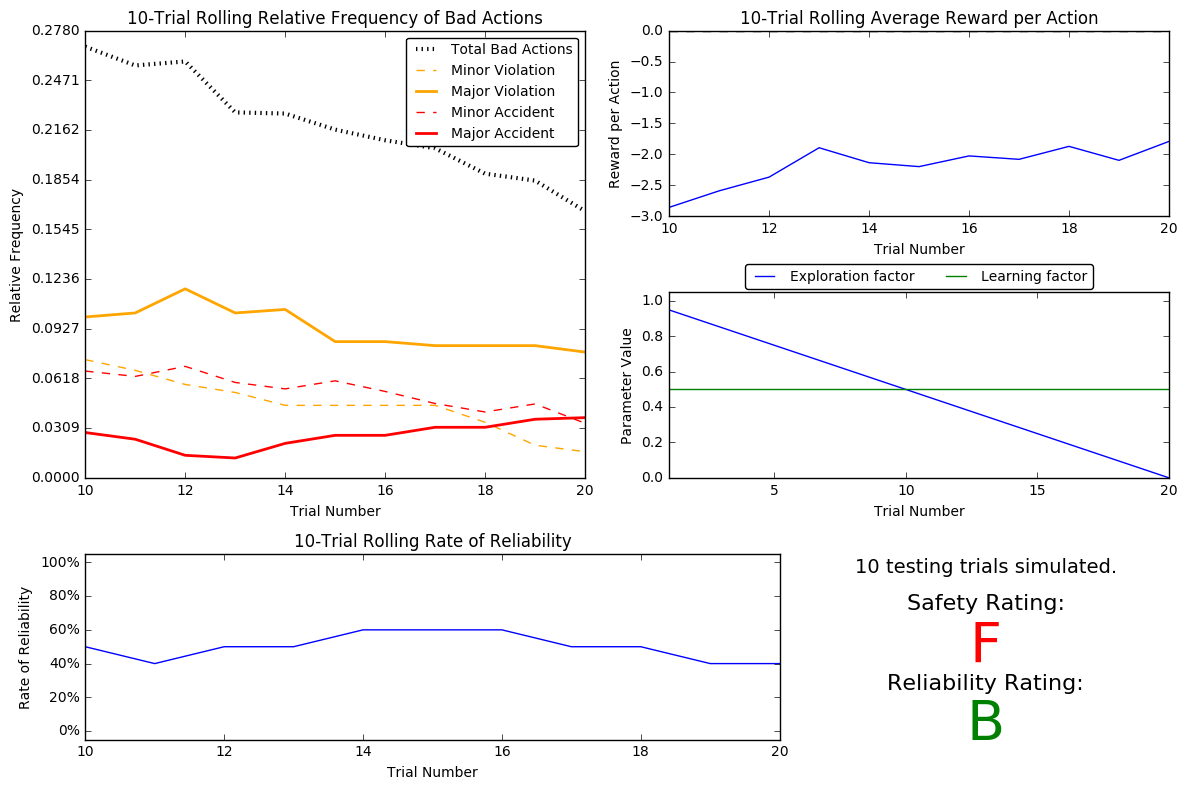

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** Analysis:

* No, there are no observations that are similar between the basic driving agent and the default Q-Learning agent.
* The driving agent undertook 20 training trials before the testing trials. This number of training trials is just enough, given that the epsilon value reached the tolerance limit of '0.05' from '1.0' in almost the same exact number of trials.
* Yes, the epsilon exploration factor is accurately represented in the graph where the value decreases steadily from '1.0' to '0.0'.
* As the number of training trials increased, the relative frequency of the total number of bad actions decreased steadily from around '0.27' to around '0.16'. By contrast, the relative frequency of the total number of bad actions fluctuated between '0.45' and '0.42' in the case of the basic driving agent. So, overall, the number of bad decisions has reduced after Q-Learning was introduced in the agent.
* The average reward per action increased from around '-2.75' to around '-1.75' as the number of trials increased. However, in case of the basic driving agent, the average reward per action only increased from '-6' to '-5'. So, the basic driving agent received less reward on average than the default Q-Learning agent.
* The reliability rating of the default Q-Learning agent improved to 'B', as compared to the 'F' received by the basic driving agent. The safety rating of the default Q-Learning agent did not improve and remained at 'F', which is exactly the same rating that the basic driving agent had received. So, the default Q-Learning agent, though not completely safe or reliable, is better than the basic driving agent in some aspects.
* The rate of reliability fluctuated between '40%' and '50%', finally stopping at '40%'. In contrast, in the basic driving agent, the rate of reliability fluctuated between '0%' and '10%'. So, the reliability of the default Q-Learning agent did not show any improvement over the reliability of the basic driving agent.
* The relative frequency of major violations decreased from around '0.10' to around '0.08' as the number of training trials increase. The relative frequency of major accidents increased from around '0.03' to around '0.04'. In contrast, for the basic driving agent, the relative frequency of major violations increases from '0.20' and '0.25' as the number of trials increases and the relative frequency of major accidents decreases from '0.08' to '0.04' as the number of trials increase. So, the default Q-Learning out-performs the basic driving agent by commiting lesser number of violations and causing lesser number of accidents.

So, the default Q-Learning agent is a good improvement over the basic driving agent.

The following resources provide good information about Q-learning:

* https://www.cse.unsw.edu.au/~cs9417ml/RL3/qlearning.htm
* http://mnemstudio.org/path-finding-q-learning-tutorial.htm
* https://studywolf.wordpress.com/2012/11/25/reinforcement-learning-q-learning-and-exploration/
* http://dreuarchive.cra.org/2001/manfredi/weeklyJournal/pricebot/node10.html
* https://cs.stanford.edu/people/karpathy/reinforcejs/gridworld_td.html

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

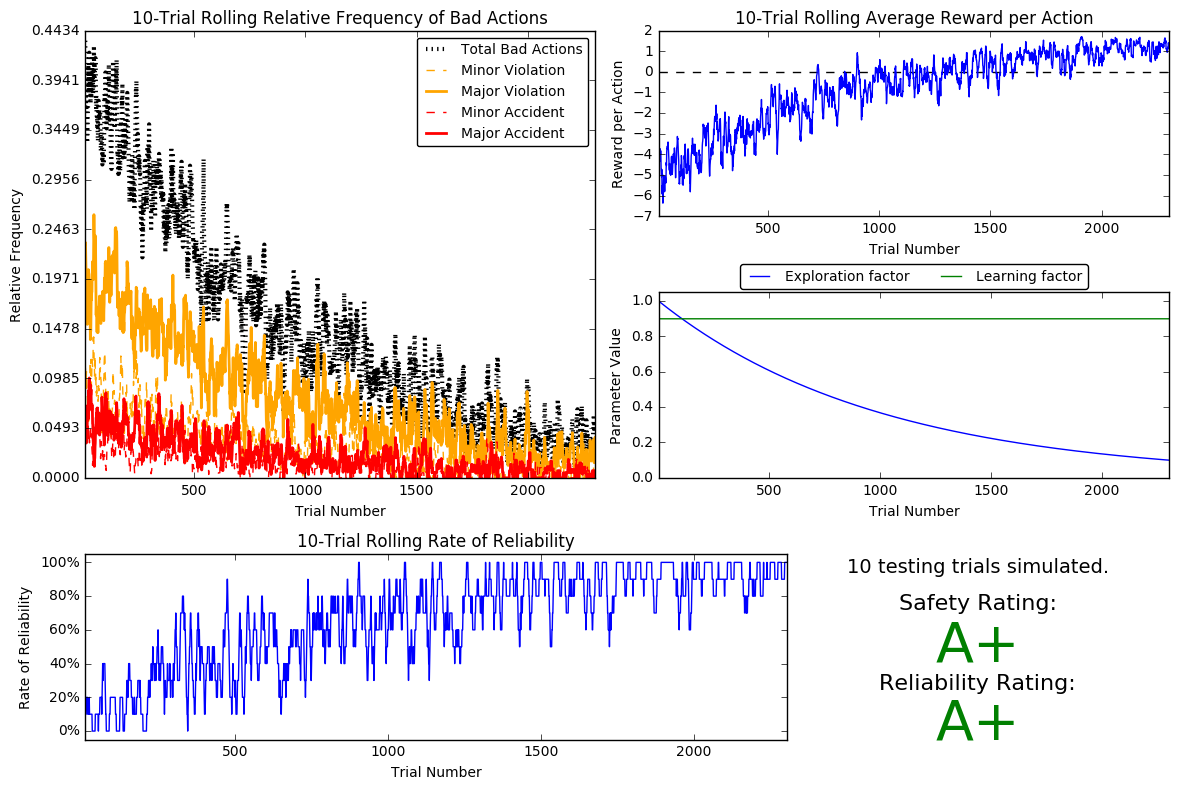

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** Analysis:

* The following function was used for epsilon (the exploration factor):

    epsilon = e^(-at)
    where t = trial number

    The above function gives a very good and smooth decaying graph. The rate of decay decreases as the value approaches '0'. The value for 'a' was chosen to be '0.001', so that there would be enough training trials.


* The agent needed around 2300 trials before the value of epsilon reached the tolerance threshold and the testing phase began. However, from the graphs, it seems that after 1500 trials, the rate of reliability was almost constant and after 2000 trials, the frequency of major violations and major accidents was constant too.
* The following values were set at the start of the simulation:
    * Alpha = 0.9
    * Epsilon = 1.0
    * Tolerance = 0.1
* The reasons for using the above values are as follows:
    * The value of alpha (the learning rate) determines the extent to which a reward for the current action is taken into consideration for calculating the previous state's Q-value. A factor of 0 will make the agent discard future rewards (thereby the agent will not learn anything). On the other hand, a factor of 1 would make the agent give a very high weight to the most recently received reward (so, the agent will try to override old information with new information every time, with less weightage given to old information). So, a value of '0.9' was chosen because the agent's goal is to learn traffic rules from immediate rewards.
    * The value of epsilon (the exploration factor) determines the extent to which new actions (which have not been explored before) are tried out. If the exploration factor is zero, then the agent will always choose the same action again, even if there's a better action available (that gives a higher reward) than the currently chosen action. On the other hand, if the exploration factor is one, then the agent will always try out new actions, even if it has the already calculated the best action to be taken for a particular state. So, the exploration rate is gradually decayed over time (trial number). An initial epsilon value of '1.0' was chosen. This gave the agent enough number of training trials where it was able to explore as many actions as possible. As the trial number increased, the agent explored less and tried to carry out the best action possible, from the list of action-reward pairs that it already possessed.
    * A tolerance value of '0.1' gave the agent enough number of training trials to explore as many actions as possible. In the Q-learning algorithm, a random number between '0.0' and '1.0' is chosen and if this random number is less than the (constantly) decaying epsilon value, then the agent tries to explore new paths. There is a very small probability (10% chance) that a random number would be chosen between 0.0 and 0.1. So, using a tolerance value lower than '0.1' did not give any visible benefits. Also, by the time the epsilon value had decayed to '0.1', the agent had already visited all the state-action pairs.
    * More information about the choice of these values is discussed here:
        * https://stackoverflow.com/questions/1854659/alpha-and-gamma-parameters-in-qlearning
        * https://en.wikipedia.org/wiki/Q-learning
* Some improvement has been made as compared to the the default Q-learning agent. At the end of all the trials, a comparision of the values is as follows:
    * Total bad actions:
        * Default Q-learning agent: '0.16'
        * Improved Q-learning agent: '0.05'
    * Major violations:
        * Default Q-learning agent: '0.08'
        * Improved Q-learning agent: '0.04'
    * Major accidents:
        * Default Q-learning agent: '0.04'
        * Improved Q-learning agent: '0.005' (approx.)
* The agent learned an appropriate policy because the average reward per action reached a good '1.5' at the end of the training trials, as compared to '-1.75' for the default Q-learning agent. Also, the rate of reliability increased from the '40%' of the default Q-learning agent to '100%' of the improved Q-learning agent.
* I'm satisfied with the Safety and the Reliabity ratings of the smartcab. The agent has a "A+" rating, both in safety and in reliability, which means that the agent followed traffic rules correctly, did not commit any violations or cause any accidents and reached the destination on time for 100% of the trips.

The following resources provide good information about q-learning, the learning rate and the exploration factor:

* https://junedmunshi.wordpress.com/2012/03/30/how-to-implement-epsilon-greedy-strategy-policy/
* https://stackoverflow.com/questions/22805872/optimal-epsilon-%CF%B5-greedy-value

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** A few example states and the optimal action to take are as follows:

('Light', 'Oncoming', 'Left', 'Next waypoint'): Best action to be taken

* ('red', 'right', None, 'forward'): None
* ('green', 'left', 'right', 'forward'): Forward
* ('green', None, 'forward', 'right'): Right
* ('green', 'left', 'right', 'left'): Left
* ('red', None, 'right', 'right'): Right

After investigating the states in 'sim_improved-learning.txt', there does not seem to be any state which does not have an optimal policy. An example of optimal policy is as follows:

* State: ('red', 'left', 'left', 'right')
* Q-table values:
    * forward : -40.51
    * None : 1.11
    * right : 2.72
    * left : -40.07

This state has the optimal policy because the smartcab can legally turn right as per US right-of-way rules and there would be no chance of an accident in this case, shown by the following reasoning:
* Light color: Red, so this means that the smartcab cannot move 'forward' or 'left'. It can only idle in it's current position or move 'right' as per US right-of-way traffic rules.
* Oncoming traffic direction: Left. This means that the oncoming traffic is going to the right side of the smartcab.
* Direction of traffic to the left of the agent: Left. The traffic is moving from the left side of the smartcab to the front side of the smartcab.
* Next waypoint: Right. The agent needs to move 'right' to get closer to the goal and that is the exact action which it chooses.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** The two reason why future rewards will not help in this project are as follows:

* Smartcab: The agent is trying to learn traffic rules. This is achieved using the immediate rewards received by the agent, after taking an action. So, breaking a traffic rule would give a immediate negative reward whereas following the traffic rules would give an immediate positive reward. Future rewards do not help in this case because they do not carry information about whether the previous action was correct or incorrect, in view of the traffic rules.
* Environment: The traffic lights change in a random manner. Also, the other agents (cars) in the environment take actions in a (seemingly) random manner as viewed by the smartcab, even if the other cars are following traffic rules themselves and have a fixed route which the smartcab does not know. The smartcab, on the other hand, is trying to learn traffic rules and reach a destination. The smartcab has a fixed agenda but the enviroment is very random in it's nature. So, in such a case, future rewards would most likely have non-deterministic values. In other words, for the same state of the environment and the smartcab, the reward received might be different each time. So, future rewards would not be beneficial as the smartcab would not be able to glean any meaningful information because there is no fixed pattern to the changes in the environment. Also, the smartcab's initial position and final destination change from trial to trial, so the smartcab cannot rely on future rewards and learn the route by rote.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.